# Анализ результатов A/B-теста для интернет-магазина BitMotion Kit

В данном исследовании была проведена оценка результатов A/B-теста, выполненного для интернет-магазина BitMotion Kit, специализирующегося на геймифицированных товарах для здорового образа жизни. Компания планировала расширить ассортимент товаров, однако выявила проблему — интерфейс сайта оказался слишком сложным для пользователей, что отражалось в отзывах. Для решения этой задачи была разработана новая версия сайта, которая была протестирована на части аудитории с целью повышения конверсии и увеличения числа покупок. 

Во время анализа в распоряжении находились данные о действиях пользователей и их распределении по группам, а также техническое задание. В рамках исследования была оценена корректность проведения A/B-теста и проанализированы его результаты для определения эффективности изменений и обоснования дальнейших шагов по улучшению сайта.

## 1. Цель и задачи исследования

### Цель

Провести оценку результатов A/B-теста на основе анализа данных интернет-магазина спортивных товаров BitMotion Kit.

### Задачи

1. Загрузить данные и ознакомиться с ними;
2. Провести предобработку данных для дальнейшего анализа;
3. Сформировать нулевую и альтернативную гипотезы;
4. Сравнить распределение данных и статистики в тестовых группах;
5. Оценить успешность нововведения.

## 2. Описание данных

Данные представлены двумя таблицами: таблица участников тестов и архив с одним csv-файлом, в котором собраны события 2020 года;

### Поля таблицы `ab_test_participants.csv`: 
[Данные предоставлены Яндекс Практикум](https://clck.ru/3Nkist)  

### Поля таблицы `ab_test_events.zip`: 
[Данные предоставлены Яндекс Практикум](https://clck.ru/3Nkist)    

## Нулевая и альтернативная гипотезы

Чтобы привлечь новых клиентов и увеличить число продаж, владельцы магазина разработали новую версию сайта и протестировали его на части пользователей. По задумке, это решение доказуемо повысит количество пользователей, которые совершат покупку.


**Нулевая гипотеза**: Конверсия пользователя в покупку на новой версии сайта не изменилась по сравнению со старой версией сайта.
$$ H 
0
 :CR 
новый
 =CR 
старый
 $$
**Альтенативная гипотеза**: Конверсия пользователя в покупку на новой версии сайта увеличилась по сравнению со старой версией сайта, и это отличие статистически значимо.
$$ H 
1
 :CR 
новый
 >CR 
старый
 $$

## Содержимое проекта

1. Загрузка данных и знакомство с ними
2. Оценка корректности теста
3. Оценка результатов A/B-тестирования
4. Итоги анализа результатов A/B-тестирования

## 1. Загрузка данных и знакомство с ними


In [2]:
# Загружаем нужные для анализа данных библиотеки 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind

In [3]:
# Загружаем датафреймы
participants = pd.read_csv(
    "https://code.s3.yandex.net/datasets/ab_test_participants.csv"
)
events = pd.read_csv(
    "https://code.s3.yandex.net/datasets/ab_test_events.zip",
    parse_dates=["event_dt"],
    low_memory=False,
)

### `ab_test_participants`

In [14]:
# Выводим на экран первые 5 строк датафрейма participants
participants.head()

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
1,001064FEAAB631A1,B,recommender_system_test,Android
2,001064FEAAB631A1,A,interface_eu_test,Android
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac


In [15]:
# Выводим на экран информацию о датафрейме participants
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
 3   device   14525 non-null  object
dtypes: object(4)
memory usage: 454.0+ KB


Данные в датафрейме представлены 4 столбцами и 14525 строками. Столбцы названы корректно, типы данных корректны, в данных нет пропусков. 

### `ab_test_events`

In [16]:
# Выводим на экран первые 5 строк датафрейма events
events.head()

,user_id,event_dt,event_name,details
0,GLOBAL,2020-12-01 00:00:00,End of Black Friday Ads Campaign,ZONE_CODE15
1,CCBE9E7E99F94A08,2020-12-01 00:00:11,registration,0.0
2,GLOBAL,2020-12-01 00:00:25,product_page,NaN
3,CCBE9E7E99F94A08,2020-12-01 00:00:33,login,NaN
4,CCBE9E7E99F94A08,2020-12-01 00:00:52,product_page,NaN


In [17]:
# Выводим на экран информацию о датафрейме events
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787286 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     787286 non-null  object        
 1   event_dt    787286 non-null  datetime64[ns]
 2   event_name  787286 non-null  object        
 3   details     249022 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 24.0+ MB


Данные в датафрейме представлены 4 столбцами и 787286 строками. Столбцы названы корректно, типы данных корректны. Пропуски в данных наблюдаются в столбце `details`, содержащем детали о событии. Пропуски в этом столбце не являются критичными для исследования.

## 2. Оценка корректности теста

Перед исследованием результатов A/B-теста важно убедиться в корректности собранных данных и его проведения. Для этого выделим участников теста из датафрейма и проверим равномерность распределения пользователей на тестовые группы.

In [18]:
# Преобразим тип данных столбца 'ab_test' с названием теста
participants['ab_test'] = participants['ab_test'].astype('category')
participants['ab_test']

0              interface_eu_test
1        recommender_system_test
2              interface_eu_test
3        recommender_system_test
4              interface_eu_test
                  ...           
14520          interface_eu_test
14521          interface_eu_test
14522    recommender_system_test
14523          interface_eu_test
14524          interface_eu_test
Name: ab_test, Length: 14525, dtype: category
Categories (2, object): ['interface_eu_test', 'recommender_system_test']

После преобразования типа данных столбца `ab_test` вывели все его значения и убедились в том, что в датафрейме содержатся данные о проведении двух A/B-тестов. Выделим пользователей участвующих в тесте о интерфейсе сайта.

In [19]:
# Отфильтровали строки датафрейма
participants_int = participants[participants['ab_test'] == 'interface_eu_test']

# Группируем пользователей по тестовым группам
participants_grouped = participants_int.groupby('group').agg({'user_id': 'count'})
participants_grouped

,user_id
group,
A,5383
B,5467


Тестовые группы имеют примерно равное количество участников и не должны исказить результаты А/В-теста.

Убедимся, что нет пользователей, которые попали в обе тестовые группы.

In [20]:
# Создаем группы пользователей из групп А и В
a_users = participants_int[participants_int['group'] == 'A']['user_id']
b_users = participants_int[participants_int['group'] == 'B']['user_id']

# Преобразуем серии в множества и находим их пересечение (общих пользователей)
intersection = list(set(a_users) & set(b_users))
print(f'Пользователей, находящихся в обеих группах: {len(intersection)}')

Пользователей, находящихся в обеих группах: 0


Убедимся, что среди пользователей теста интерфейса сайта нет пользователей, участвующих в других тестах. 

In [21]:
# Создаем группы пользователей из групп разных тестов
interface_test = participants[participants['ab_test'] == 'interface_eu_test']['user_id']
recommender_test = participants[participants['ab_test'] == 'recommender_system_test']['user_id']

# Преобразуем серии в множества и находим их пересечение (общих пользователей)
intersection = list(set(interface_test) & set(recommender_test))
print(f'Пользователей, находящихся в обеих группах: {len(intersection)}')

Пользователей, находящихся в обеих группах: 887


Данные пользователи, участвуя в двух тестах одновременно, искажают результаты теста, так как нельзя точно сказать, какое именно изменение в работе продукта повлияло на их поведение, поэтому во изюежание искажения результатов теста эти строки следует удалить.

In [22]:
# Удаляем найденные ранее строки
participants.drop(
    index=participants.loc[participants['user_id'].isin(intersection)].index,
    inplace=True
)

# Перезаписываем датафрейм с участниками теста интерфейса
participants_int = participants[participants['ab_test'] == 'interface_eu_test']

В датафрейме `events` оставим только события, связанные с участвующими в тесте пользователями.

In [23]:
# Список пользователей, участвующих в тесте 
users_in_test = participants_int['user_id'].unique()

# Фильтруем события только для этих пользователей
events_int = events[events['user_id'].isin(users_in_test)]

Рассчитаем время (лайфтайм) совершения события после регистрации и оставим только события, которые были совершены в течение семи первых дней с момента регистрации.

In [24]:
# Определяем дату регистрации
registration_dates = (
    events_int.loc[events_int['event_name'] == 'registration', ['user_id', 'event_dt']]
    .groupby('user_id', as_index=False, sort=False)
    .min()
    .rename(columns={'event_dt': 'registration_date'})
)

# Оставляем только пользователей с регистрацией
events_int = events_int.merge(registration_dates, on='user_id', how='inner')

# Вычисляем разницу в днях
events_int['lifetime_days'] = (events_int['event_dt'] - events_int['registration_date']).dt.days

# Фильтруем события, произошедшие в первые 7 дней после регистрации включительно
events_filtered = events_int[events_int['lifetime_days'].between(0, 7)].copy()
events_filtered.head()

,user_id,event_dt,event_name,details,registration_date,lifetime_days
0,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0,2020-12-06 14:10:01,0
1,5F506CEBEDC05D30,2020-12-07 01:25:14,login,NaN,2020-12-06 14:10:01,0
2,5F506CEBEDC05D30,2020-12-07 01:25:47,login,NaN,2020-12-06 14:10:01,0
3,5F506CEBEDC05D30,2020-12-09 12:40:49,login,NaN,2020-12-06 14:10:01,2
4,5F506CEBEDC05D30,2020-12-09 12:40:49,product_page,NaN,2020-12-06 14:10:01,2


### Оценка параметров теста

Заданные параметры теста: 
* базовый показатель конверсии — 30%,
* мощность теста — 80%,
* достоверность теста — 95%,
* MDE — 3%.
  
Заданные параметры являются стандартными для продуктовой гипотезы и подходят для данного исследования. Найдем необходимый размер выборки для каждой группы.

In [25]:
from statsmodels.stats.power import zt_ind_solve_power

# Параметры
p1 = 0.30
p2 = p1 + 0.03  # ожидаемый эффект (MDE)
effect_size = 0.2  # Минимальный значимый эффект
alpha = 0.05       # Уровень значимости 
power = 0.8        # Статистическая мощность

# Вычисляем Cohen's h для разницы пропорций
def proportion_effect_size(p1, p2):
    return 2 * np.arcsin(np.sqrt(p2)) - 2 * np.arcsin(np.sqrt(p1))

effect_size = proportion_effect_size(p1, p2)

# Расчет размера выборки на группу при равных группах
sample_size_per_group = zt_ind_solve_power(effect_size=effect_size,
                                            alpha=alpha,
                                            power=power,
                                            ratio=1.0,
                                            alternative='two-sided')

print(f"Требуемый размер выборки на группу: {int(sample_size_per_group)}")

Требуемый размер выборки на группу: 3761


Рассчитаем для каждой группы количество посетителей, сделавших покупку, и общее количество посетителей, для того, чтобы убедиться, что в выборках достаточно данных для корректного результата теста.

In [26]:
# Находим пользователей из тестовых групп
a_visitors =  participants_int[participants_int['group'] == 'A']
b_visitors =  participants_int[participants_int['group'] == 'B']

# Считаем число посетителей из каждой группы
a_visitors_total = a_visitors['user_id'].nunique()
b_visitors_total = b_visitors['user_id'].nunique()

# Находим множество всех покупателей
buyers = events_int[events_int['event_name'] == 'purchase']['user_id']

# Получаем множества user_id для покупателей и посетителей групп A и B
buyers_set = set(buyers)
a_visitors_set = set(a_visitors['user_id'])
b_visitors_set = set(b_visitors['user_id'])

# Находим количество покупателей в каждой группе
a_buyers_count = len(buyers_set & a_visitors_set)
b_buyers_count = len(buyers_set & b_visitors_set)

# Составляем таблицу для удобной визуализации
data = {
    'Группа': ['A', 'B'],
    'Общее кол-во посетителей': [a_visitors_total, b_visitors_total],
    'Кол-во покупателей': [a_buyers_count, b_buyers_count]
}

# Преобразуем в DataFrame
result_df = pd.DataFrame(data)
result_df

,Группа,Общее кол-во посетителей,Кол-во покупателей
0,A,4952,1638
1,B,5011,1782


Сравним показатели конверсии в контрольной группе и группе, использовавшей новый интерфейс.

In [27]:
# Доли покупателей в тестовых группах
a_buyers_share = (a_buyers_count / a_visitors_total) * 100
b_buyers_share = (b_buyers_count / b_visitors_total) * 100

# Базовая конверсия
baseline_conversion = 0.30

# Целевой прирост в процентах
target_increase = 0.03 

# Расчет целевой конверсии
target_conversion = baseline_conversion + target_increase

print(f"""Конверсия в покупку в группе А: {a_buyers_share:.4f}%
Конверсия в покупку в группе В: {b_buyers_share:.4f}%
""")

if b_buyers_share >= target_conversion:
    print("Группа В достигла или превысила целевой уровень конверсии.")
else:
    print("Группа В не достигла целевого уровня конверсии.")

Конверсия в покупку в группе А: 33.0775%
Конверсия в покупку в группе В: 35.5618%

Группа В достигла или превысила целевой уровень конверсии.


### Предварительный вывод

Количество задействованных в тестировании пользователей превышает требуемое количество пользователей, что подтверждает корректность теста.

В контрольной группе количество пользователей, совершивших покупку меньше, чем в группе В, но в то же время и общее чисо пользователей в контрольной группе ниже. В то время как расхождение в общем числе пользователей достаточно незначительно (1.18%), количество покупателей в группе В выше на 8%, что можно считать значительным приростом. Следовтельно, можно сделать следующий предварительный вывод: **число покупателей увеличилось**. 

## 3. Оценка результатов A/B-тестирования

Так как оценка результатов A/B-тестирования включает в себя сравнение конверсий в покупку двух групп. Сравнение долей позволяет провести Z-тест пропорций. 

Проверим, что динамика количества пользователей в группах сопоставима.

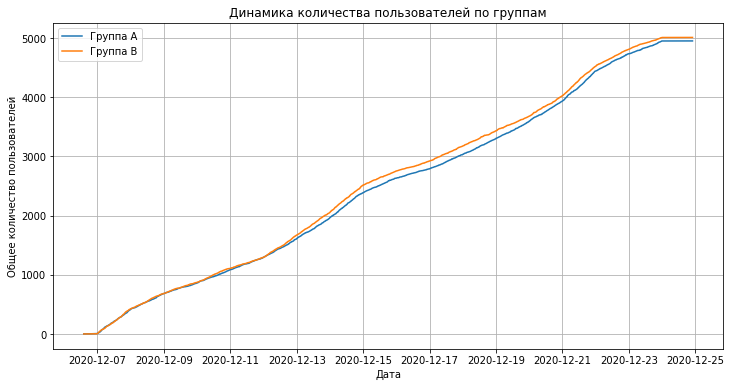

In [28]:
# Объединяем с participants_int по user_id, добавляя колонку registration_date
participants_int = participants_int.merge(registration_dates, on='user_id', how='left')

# Создаем таблицу с датами и группами
participants_groups = participants_int[['user_id', 'group', 'registration_date']]

# Группируем по дате регистрации и группе
daily_counts = (
    participants_groups.groupby(['registration_date', 'group'])
    .size()
    .reset_index(name='new_users')
)

# Создаем сводную таблицу для накопительного подсчета
pivot_table = daily_counts.pivot(index='registration_date', columns='group', values='new_users').fillna(0)

# Вычисляем накопительный итог по каждой группе
cumulative = pivot_table.cumsum()

# Строим график
plt.figure(figsize=(12, 6))
for group in ['A', 'B']:
    if group in cumulative.columns:
        plt.plot(cumulative.index, cumulative[group], label=f'Группа {group}')

plt.xlabel('Дата')
plt.ylabel('Общее количество пользователей')
plt.title('Динамика количества пользователей по группам')
plt.legend()
plt.grid(True)
plt.show()

Динамика пользователей в обеих тестовых группах достаточно схожа для проведения Z-теста пропорций.
Проверим достаточное ли количество данных представлено в тестовых группах.

In [29]:
# Находим размеры выборок A и B
n_a = a_visitors_total
n_b = b_visitors_total

# Находим количество успехов (покупателей) в группах А и B
m_a = a_buyers_count
m_b = b_buyers_count 

# Рассчитываем доли успехов для каждой группы: A и B
p_a, p_b = m_a/n_a, m_b/n_b 

if (p_a*n_a > 10)and((1-p_a)*n_a > 10)and(p_b*n_b > 10)and((1-p_b)*n_b > 10):
    print('Предпосылка о достаточном количестве данных выполняется!')
else:
    print('Предпосылка о достаточном количестве данных НЕ выполняется!')

Предпосылка о достаточном количестве данных выполняется!


In [30]:
from statsmodels.stats.proportion import proportions_ztest

# Устанавливаем заданный уровень значимости
alpha = 0.05 
stat_ztest, p_value_ztest = proportions_ztest(
    [m_a, m_b],
    [n_a, n_b],
    alternative='smaller' 
)

if p_value_ztest > alpha:
    print(f'pvalue={p_value_ztest} > {alpha}')
    print('Нулевая гипотеза находит подтверждение!')
else:
    print(f'pvalue={p_value_ztest} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения!')

pvalue=0.004511578024761222 < 0.05
Нулевая гипотеза не находит подтверждения!


## 4. Итоги анализа результатов A/B-тестирования

На основе проведённого анализа результатов A/B-тестирования можно сделать следующие выводы:

В рамках эксперимента было задействовано 10 850 пользователей, которые разделены на две группы: контрольную, использовавшую старый интерфейс сайта и тестовую, использовавшую обновленную версию сайта. Обе группы были сбалансированы по ключевым характеристикам, что обеспечило корректность сравнения.

Параметры теста:
* Уровень значимости — 0.05
* Вероятность ошибки второго рода — 20%
* Мощность теста — 80%
* Минимальный детектируемый эффект (MDE) — 3%
* Базовая конверсия — 30%
  
Внедрение нового дизайна сайта привело к статистически значимому росту конверсии в покупку. 
Конверсия в покупку в группе В составила 35.6%, что превышает установленную отметку в 33%. Анализ доказал, что показатели выросли относительно контрольной группы, что свидетельствует о наличии заметного эффекта от нововведения.

Значение p-value для Z-теста пропорций составляет 0.0045, что значительно ниже уровня значимости 0.05. Это означает, что нулевая гипотеза о равенстве конверсий в покупку между группами отвергается. Таким образом, было выявлено статистически значимое различие в показателях конверсии в покупку с сайта после внедрения нового дизайна и до него.

Учитывая, что тест показал статистическую значимость, рекомендуется внедрять новый дизайн для основной аудитории. Это свидетельствует о наличии значимого эффекта и оправдывает использование данного нововведения для дальнешйнего развития сайта интернет-магазина. В дальнейшем рекомендуется провести дополнительные исследования для оптимизации сайта и процесса оформления заказа, но на данном этапе внедрение целесообразно.